In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results_20240106.csv')

# Research Questions: 
1. What are the top 5 restaurants with violations?
2. How do inspection grades compare across all boroughs? 
3. What are the top 5 violations across all boroughs?
4. Which borough has the most rodent violations?
5. What are the top 10 cuisines?

In [23]:
#Basic overview of data
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50142158,THE ATRIUM AT LAGUARDIA - POUR AUTHORITY,Queens,1,CENTRAL TERMINAL,NaN,9723556751,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
1,50145760,SUBWAY,Bronx,2958,JEROME AVENUE,10468.0,5165320557,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,40.872768,-73.889629,207.0,11.0,40701.0,2017608.0,2.033200e+09,BX28,NaN
2,50131226,SEA PEARL,Queens,15616,NORTHERN BLVD,11354.0,9175828629,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,40.763984,-73.808901,407.0,20.0,117100.0,4444996.0,4.052750e+09,QN51,NaN
3,50092462,THREES BREWING,Manhattan,517,CLAYTON ROAD,10004.0,7185222110,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,40.691054,-74.019624,101.0,1.0,500.0,1086421.0,1.000010e+09,MN99,NaN
4,41510846,218 RESTAURANT,Manhattan,218220,GRAND STREET,NaN,2122268039,Chinese,09/09/2021,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,37.0,NaN,NaN,01/06/2024,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN


In [24]:
#number of rows & columns in the dataset
df.shape

(211808, 27)

In [25]:
#Display all measures of the dataset
pd.set_option('display.max_columns', None)
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50142158,THE ATRIUM AT LAGUARDIA - POUR AUTHORITY,Queens,1,CENTRAL TERMINAL,NaN,9723556751,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
1,50145760,SUBWAY,Bronx,2958,JEROME AVENUE,10468.0,5165320557,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,40.872768,-73.889629,207.0,11.0,40701.0,2017608.0,2.033200e+09,BX28,NaN
2,50131226,SEA PEARL,Queens,15616,NORTHERN BLVD,11354.0,9175828629,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,40.763984,-73.808901,407.0,20.0,117100.0,4444996.0,4.052750e+09,QN51,NaN
3,50092462,THREES BREWING,Manhattan,517,CLAYTON ROAD,10004.0,7185222110,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,40.691054,-74.019624,101.0,1.0,500.0,1086421.0,1.000010e+09,MN99,NaN
4,41510846,218 RESTAURANT,Manhattan,218220,GRAND STREET,NaN,2122268039,Chinese,09/09/2021,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,37.0,NaN,NaN,01/06/2024,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN


In [26]:
#list of all columns in the dataset
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

In [27]:
#values for CUISINE DESCRIPTION measure
df['CUISINE DESCRIPTION'].unique()

array([nan, 'Chinese', 'Coffee/Tea', 'Italian', 'American', 'Chicken',
       'Thai', 'Mexican', 'Caribbean', 'Donuts', 'Latin American',
       'Korean', 'Seafood', 'Pizza', 'Bangladeshi', 'Bagels/Pretzels',
       'Soul Food', 'Greek', 'Japanese', 'Barbecue', 'Indian',
       'Southeast Asian', 'Asian/Asian Fusion', 'Other', 'Sandwiches',
       'Juice, Smoothies, Fruit Salads', 'Hamburgers', 'Steakhouse',
       'Peruvian', 'Irish', 'Middle Eastern', 'Jewish/Kosher', 'French',
       'Frozen Desserts', 'Spanish', 'Bottled Beverages',
       'Bakery Products/Desserts', 'Tex-Mex', 'Hotdogs', 'Fusion',
       'African', 'Hawaiian', 'Mediterranean', 'Chinese/Japanese',
       'Pakistani', 'Vegetarian', 'Salads', 'Egyptian',
       'Hotdogs/Pretzels', 'Afghan', 'Soups/Salads/Sandwiches',
       'Chinese/Cuban', 'Australian', 'Eastern European', 'Tapas',
       'Continental', 'Turkish', 'Vegan', 'Ethiopian',
       'Sandwiches/Salads/Mixed Buffet', 'Filipino', 'Cajun', 'Brazilian',
      

In [28]:
#values for VIOLATION DESCRIPTION measure
df['VIOLATION DESCRIPTION'].unique()

array([nan, 'Hot food item not held at or above 140º F.',
       'Thawing procedure improper.',
       "Live roaches in facility's food or non-food area.",
       "Evidence of mice or live mice in establishment's food or non-food areas.",
       'Hot TCS food item not held at or above 140 °F.',
       'Thawing procedures improper.',
       'Wiping cloths soiled or not stored in sanitizing solution.',
       'MISBRANDED AND LABELING',
       'Food contact surface not properly maintained.',
       'Hand wash sign not posted',
       'Required calorie information not posted/improperly posted.',
       'Current letter grade sign not posted.',
       'Flavored tobacco products sold, offered for sale',
       "Live roaches present in facility's food and/or non-food areas.",
       "Evidence of mice or live mice present in facility's food and/or non-food areas.",
       'Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.',
       'Accurate therm

In [29]:
#values for GRADE measure
df['GRADE'].unique()

array([nan, 'A', 'Z', 'N', 'P', 'C', 'B'], dtype=object)

In [30]:
#values for BORO measure
#not sure why there is a '0' value. This will be dropped during cleanup of the data
df['BORO'].unique()

array(['Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn', '0'],
      dtype=object)

In [31]:
#simple statistics
#count of values from 'DBA' measure
df.groupby(['DBA'])['DBA'].count().sort_values(ascending=False)

DBA
DUNKIN                        2584
SUBWAY                        1590
STARBUCKS                     1255
MCDONALD'S                    1064
POPEYES                        701
                              ... 
NEW EMERALD FORTUNE BAKERY       1
NEW FORTUNE GARDEN               1
NEW HAPPY GOLDEN HOUSE           1
NEW WASAKAKA FRIED CHICKEN       1
silverfactory                    1
Name: DBA, Length: 22180, dtype: int64

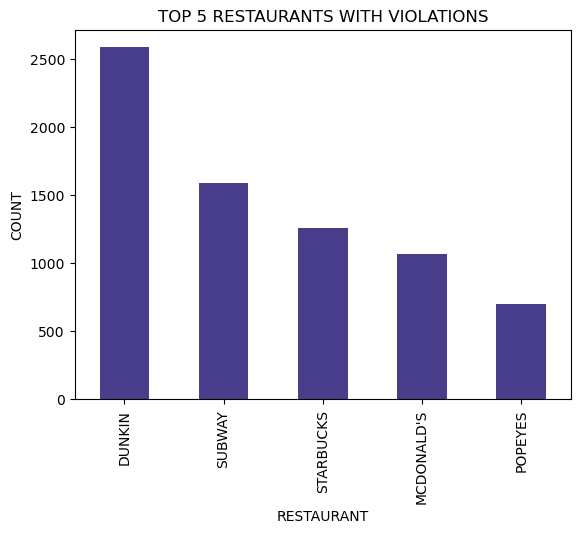

In [32]:
#Visualization for Top 5 Restaurants with Violations

top5_restaurants_with_violations = df['DBA'].value_counts().head(5).sort_values(ascending=False)

top5_restaurants_with_violations.plot(kind='bar',color='darkslateblue', title='TOP 5 RESTAURANTS WITH VIOLATIONS')
plt.xlabel('RESTAURANT')
plt.ylabel('COUNT')
plt.show()                  


In [33]:
#cleanup of data
#dropping '0' value
df=df.drop(df[df['BORO']=='0'].index)
df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50142158,THE ATRIUM AT LAGUARDIA - POUR AUTHORITY,Queens,1,CENTRAL TERMINAL,NaN,9723556751,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
1,50145760,SUBWAY,Bronx,2958,JEROME AVENUE,10468.0,5165320557,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,40.872768,-73.889629,207.0,11.0,40701.0,2017608.0,2.033200e+09,BX28,NaN
2,50131226,SEA PEARL,Queens,15616,NORTHERN BLVD,11354.0,9175828629,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,40.763984,-73.808901,407.0,20.0,117100.0,4444996.0,4.052750e+09,QN51,NaN
3,50092462,THREES BREWING,Manhattan,517,CLAYTON ROAD,10004.0,7185222110,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/06/2024,NaN,40.691054,-74.019624,101.0,1.0,500.0,1086421.0,1.000010e+09,MN99,NaN
4,41510846,218 RESTAURANT,Manhattan,218220,GRAND STREET,NaN,2122268039,Chinese,09/09/2021,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,37.0,NaN,NaN,01/06/2024,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211803,50093303,YUN'S BEST KITCHEN,Queens,4570,KISSENA BLVD,11355.0,6465933399,Chinese,07/26/2022,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,0.0,NaN,NaN,01/06/2024,Cycle Inspection / Initial Inspection,40.750774,-73.819304,407.0,20.0,84500.0,4438152.0,4.051480e+09,QN22,NaN
211804,50053112,MODERN LOVE,Brooklyn,317,UNION AVENUE,11211.0,9292980626,Vegan,11/23/2019,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,21.0,NaN,NaN,01/06/2024,Cycle Inspection / Initial Inspection,40.709838,-73.950941,301.0,34.0,51300.0,3063052.0,3.024130e+09,BK73,NaN
211805,50086019,BOCAITO,Queens,8115,NORTHERN BLVD,11372.0,3476171606,Latin American,02/14/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,13.0,A,02/14/2023,01/06/2024,Cycle Inspection / Initial Inspection,40.755487,-73.886067,403.0,25.0,32700.0,4026950.0,4.011770e+09,QN28,NaN
211806,41565678,CHECKERS,Bronx,260,EAST 161 STREET,10451.0,7185857777,Hamburgers,10/26/2021,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,6.0,A,10/26/2021,01/06/2024,Cycle Inspection / Initial Inspection,40.825679,-73.918813,204.0,16.0,6100.0,2002457.0,2.024430e+09,BX14,NaN


In [34]:
#simple statistic (count) of many times each borough appears in the dataset
#also verifies that the '0' value was dropped
df.groupby(['BORO'])['BORO'].count().sort_values(ascending=False)

BORO
Manhattan        78427
Brooklyn         56828
Queens           50390
Bronx            18721
Staten Island     7432
Name: BORO, dtype: int64

In [35]:
#further cleanup 
gradebyboro=df[['BORO','GRADE']]
gradebyboro

,BORO,GRADE
0,Queens,NaN
1,Bronx,NaN
2,Queens,NaN
3,Manhattan,NaN
4,Manhattan,NaN
...,...,...
211803,Queens,NaN
211804,Brooklyn,NaN
211805,Queens,A
211806,Bronx,A


In [36]:
#rename columns
gradebyboro_new = gradebyboro.rename(columns={'BORO':'BOROUGH'})
gradebyboro_new

,BOROUGH,GRADE
0,Queens,NaN
1,Bronx,NaN
2,Queens,NaN
3,Manhattan,NaN
4,Manhattan,NaN
...,...,...
211803,Queens,NaN
211804,Brooklyn,NaN
211805,Queens,A
211806,Bronx,A


In [37]:
#count of how many missing values are in the GRADE measure
gradebyboro_new.isnull().sum()

BOROUGH         0
GRADE      108470
dtype: int64

In [38]:
#further cleanup by dropping missing values
gradebyboro_final=gradebyboro_new.dropna()
gradebyboro_final

,BOROUGH,GRADE
8,Queens,A
43,Brooklyn,A
45,Brooklyn,A
54,Queens,Z
61,Brooklyn,Z
...,...,...
211801,Queens,A
211802,Brooklyn,A
211805,Queens,A
211806,Bronx,A


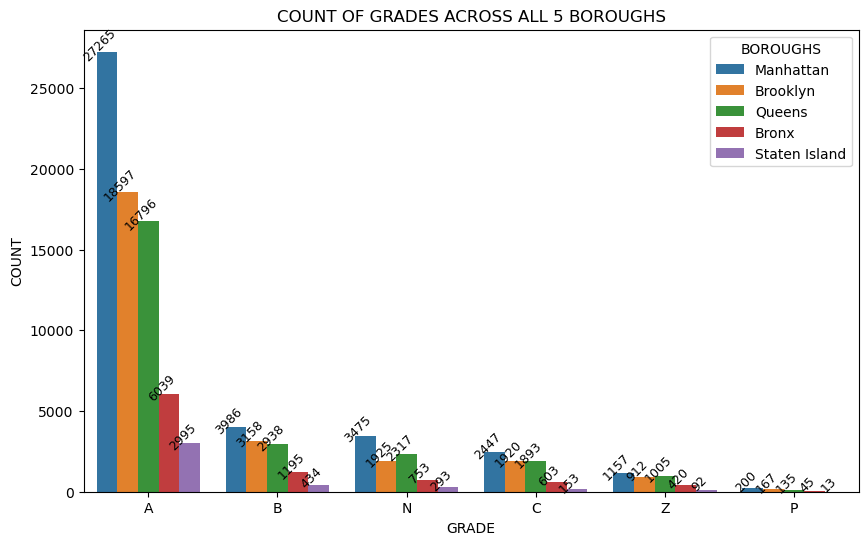

In [64]:
#Visualization of grades across all boroughs
grade_counts = gradebyboro_final.groupby(['BOROUGH', 'GRADE']).size().reset_index(name='COUNT')

grade_counts_sorted = grade_counts.sort_values(by=['COUNT'], ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='GRADE', y='COUNT', hue='BOROUGH', data=grade_counts_sorted, order=grade_counts_sorted['GRADE'].unique())

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 6., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points', rotation=45)

plt.title('COUNT OF GRADES ACROSS ALL 5 BOROUGHS')
plt.xlabel('GRADE')
plt.ylabel('COUNT')
plt.legend(title='BOROUGHS', loc='upper right')
plt.show()


In [56]:
#count of grades by borough
gradebyboro_new.groupby(['BOROUGH'])['GRADE'].count().sort_values(ascending=False)

BOROUGH
Manhattan        38530
Brooklyn         26679
Queens           25084
Bronx             9055
Staten Island     3980
Name: GRADE, dtype: int64

In [42]:
#count of grades
gradebyboro_new.groupby(['GRADE'])['GRADE'].count().sort_values(ascending=False)

GRADE
A    71692
B    11711
N     8763
C     7016
Z     3586
P      560
Name: GRADE, dtype: int64

In [43]:
#cleanup of data
#dropping columns
violation=df[['BORO','VIOLATION CODE']]
violation

,BORO,VIOLATION CODE
0,Queens,NaN
1,Bronx,NaN
2,Queens,NaN
3,Manhattan,NaN
4,Manhattan,02B
...,...,...
211803,Queens,10F
211804,Brooklyn,02B
211805,Queens,10F
211806,Bronx,10F


In [44]:
#rename columns
violation_rename = violation.rename(columns={'BORO':'BOROUGH'})
violation_rename

,BOROUGH,VIOLATION CODE
0,Queens,NaN
1,Bronx,NaN
2,Queens,NaN
3,Manhattan,NaN
4,Manhattan,02B
...,...,...
211803,Queens,10F
211804,Brooklyn,02B
211805,Queens,10F
211806,Bronx,10F


In [45]:
#dropping N/A values
violation_rename=violation_rename.dropna()
violation_rename

,BOROUGH,VIOLATION CODE
4,Manhattan,02B
42,Bronx,02B
43,Brooklyn,02B
45,Brooklyn,02B
49,Queens,09B
...,...,...
211803,Queens,10F
211804,Brooklyn,02B
211805,Queens,10F
211806,Bronx,10F


In [46]:
#count of violation codes 
violation_rename.groupby(['VIOLATION CODE'])['VIOLATION CODE'].count().sort_values(ascending=False)

VIOLATION CODE
10F      29090
08A      22800
06D      14141
04L      13864
02G      12517
         ...  
22B          1
20C          1
19-03        1
19-08        1
15-32        1
Name: VIOLATION CODE, Length: 144, dtype: int64

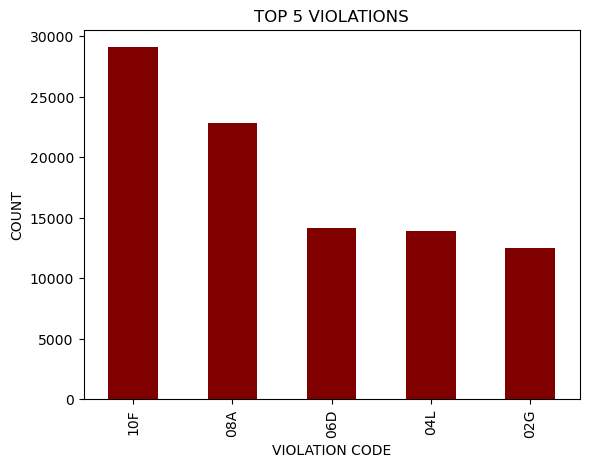

In [65]:
#visualization for the top 5 violations
top_5_violations= violation_rename['VIOLATION CODE'].value_counts().head(5).sort_values(ascending=False)

top_5_violations.plot(kind='bar', color='maroon', title= 'TOP 5 VIOLATIONS')
plt.xlabel('VIOLATION CODE')
plt.ylabel('COUNT')
plt.show()

10F: Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.

08A: Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.

06D: Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.

04L:Evidence of mice or live mice present in facility's food and/or non-food areas.

02G:Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.

In [47]:
#cleanup of data
#dropping columns
rodent_violation=df[['BORO','VIOLATION CODE']]
rodent_violation

,BORO,VIOLATION CODE
0,Queens,NaN
1,Bronx,NaN
2,Queens,NaN
3,Manhattan,NaN
4,Manhattan,02B
...,...,...
211803,Queens,10F
211804,Brooklyn,02B
211805,Queens,10F
211806,Bronx,10F


In [48]:
#Selecting rows only for rodent violations 
rodent_new=rodent_violation.loc[df['VIOLATION CODE']== '04L']

In [49]:
rodent_new

,BORO,VIOLATION CODE
58,Manhattan,04L
165,Brooklyn,04L
205,Queens,04L
320,Manhattan,04L
322,Brooklyn,04L
...,...,...
211722,Brooklyn,04L
211734,Manhattan,04L
211737,Queens,04L
211741,Queens,04L


In [50]:
#rename column
rodent_rename= rodent_new.rename(columns={'BORO':'BOROUGH'})
rodent_rename

,BOROUGH,VIOLATION CODE
58,Manhattan,04L
165,Brooklyn,04L
205,Queens,04L
320,Manhattan,04L
322,Brooklyn,04L
...,...,...
211722,Brooklyn,04L
211734,Manhattan,04L
211737,Queens,04L
211741,Queens,04L


In [51]:
plot_rodent= rodent_rename.groupby(['BOROUGH'])['BOROUGH'].count().sort_values(ascending=False)

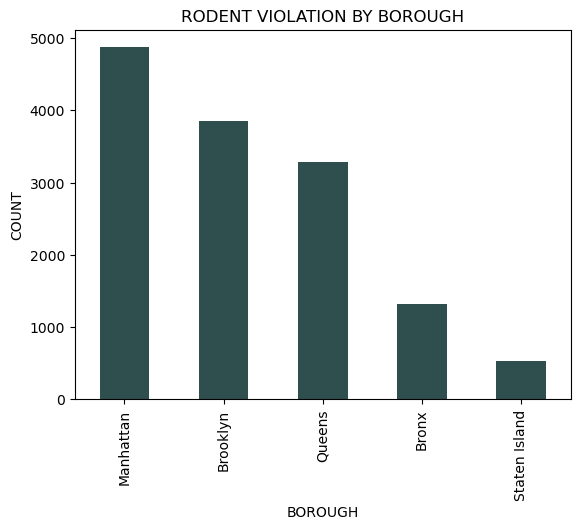

In [52]:
#visualization of rodent count violations by borough
plot_rodent.plot(kind='bar', color='darkslategrey')
plt.title('RODENT VIOLATION BY BOROUGH')
plt.xlabel('BOROUGH')
plt.ylabel('COUNT')
plt.show()


In [53]:
#count of different cuisines in the dataset
df.groupby(['CUISINE DESCRIPTION'])['CUISINE DESCRIPTION'].count().sort_values(ascending=False)

CUISINE DESCRIPTION
American          34840
Chinese           20558
Coffee/Tea        14332
Pizza             12964
Latin American     8313
                  ...  
Southwestern         22
Czech                12
Basque                9
Haute Cuisine         5
Chimichurri           2
Name: CUISINE DESCRIPTION, Length: 89, dtype: int64

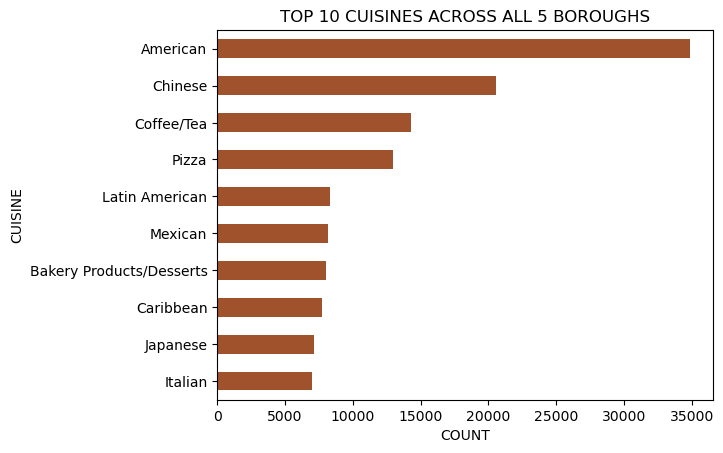

In [54]:
#visualization of top cuisines
top_10_cuisines = df['CUISINE DESCRIPTION'].value_counts().head(10).sort_values(ascending=True)

top_10_cuisines.plot(kind='barh',color='sienna', title='TOP 10 CUISINES ACROSS ALL 5 BOROUGHS')
plt.xlabel('COUNT')
plt.ylabel('CUISINE')
plt.show()                  


# CONCLUSION 

Based on the visulization for grades across all boroughs, there was a trend where Manhattan earned the top grade of an A followed by Brooklyn, Queens, Bronx and Staten Island. The top cuisine was 'American' food with the top resturant that had the most violations  was Dunkin Donuts. For the graph showing the top 5 violations across all boroughs, the violation code 10F was significant throughout the dataset. This code indicates: Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit. Finally, Manhattan was the borough that had the highest rodent violations with Brooklyn being 2nd followed by Queens, Bronx, and Staten Island. 